<a href="https://colab.research.google.com/github/Adigozalovh/Machine-Learning/blob/main/Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L -o healthcare-dataset.zip https://www.kaggle.com/api/v1/datasets/download/prasad22/healthcare-dataset
!unzip /content/healthcare-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2982k  100 2982k    0     0  1925k      0  0:00:01  0:00:01 --:--:-- 3031k
Archive:  /content/healthcare-dataset.zip
replace healthcare_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/healthcare_dataset.csv')

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
df.shape

(55500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


### Question 1: Xəstəliyin diaqnozu ilə demoqrafik göstəricilər (yaş, cins) arasında əlaqə varmı?


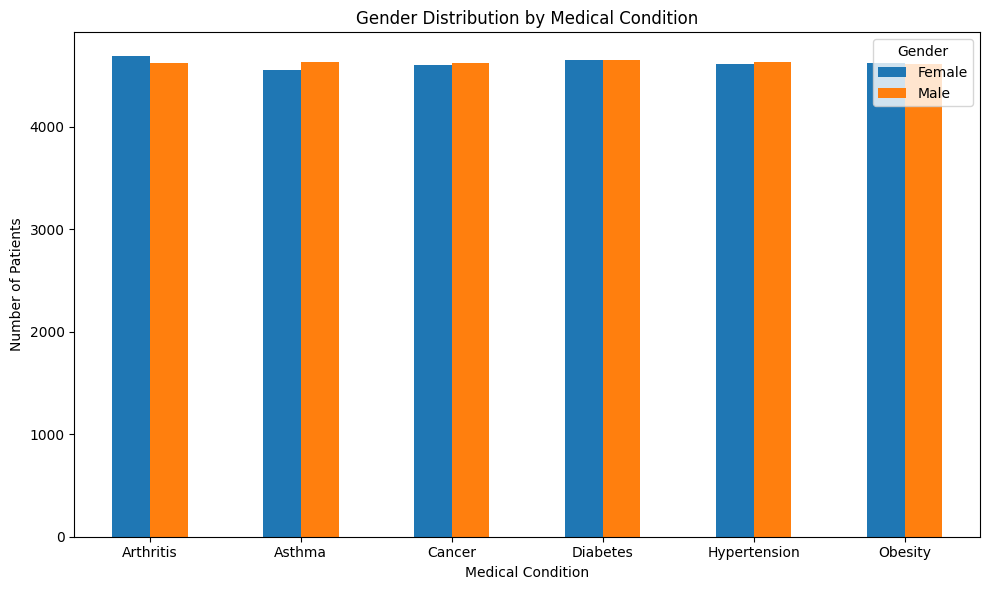

In [ ]:
condition_gender_counts = df.groupby(['Medical Condition', 'Gender']).size().unstack(fill_value=0)

condition_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3572964511.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_age_counts = df.groupby(['Medical Condition', 'Age Group']).size().unstack(fill_value=0)


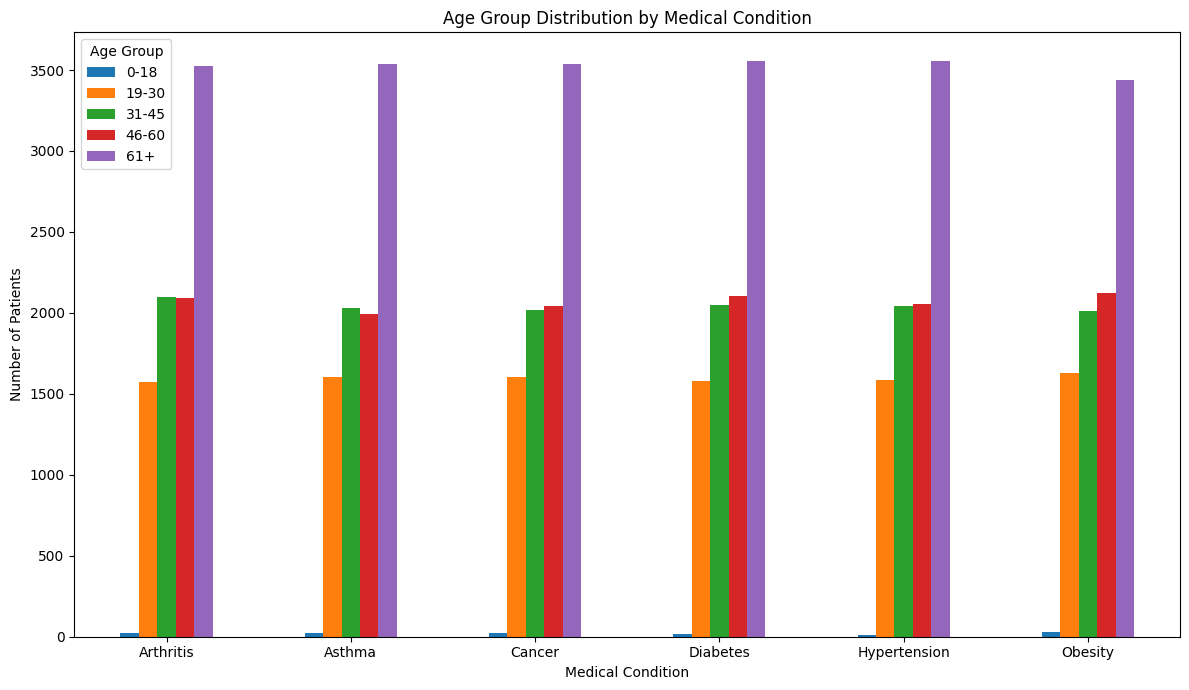

In [ ]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

condition_age_counts = df.groupby(['Medical Condition', 'Age Group']).size().unstack(fill_value=0)

condition_age_counts.plot(kind='bar', figsize=(12, 7))
plt.title('Age Group Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 2: Müalicə xərcləri xəstənin vəziyyətinə görə necə dəyişir?

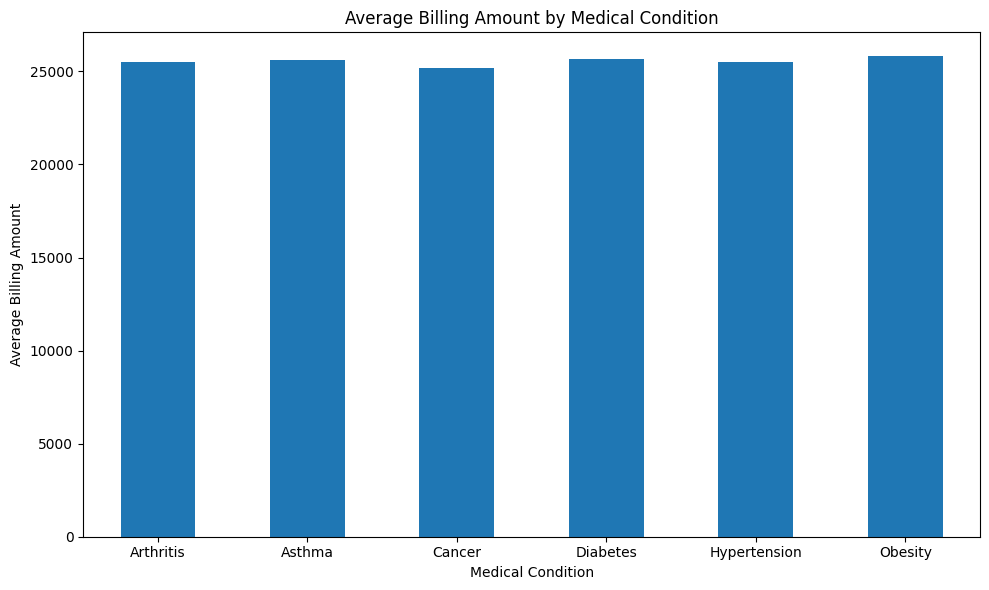

In [ ]:
avg_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean()

plt.figure(figsize=(10, 6))
avg_billing_by_condition.plot(kind='bar')
plt.title('Average Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 3: Xəstəxanaya yatma müddəti (hospital stay) və nəticə arasında əlaqə varmı?


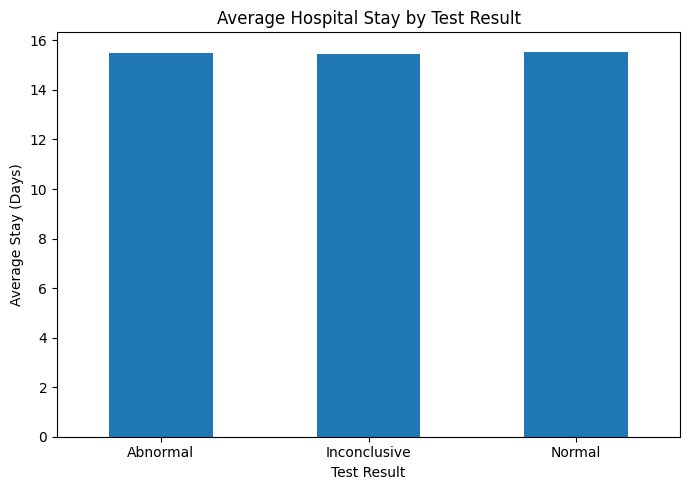

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Hospital Stay (Days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

avg_stay_by_result = df.groupby('Test Results')['Hospital Stay (Days)'].mean()

plt.figure(figsize=(7, 5))
avg_stay_by_result.plot(kind='bar')
plt.title('Average Hospital Stay by Test Result')
plt.xlabel('Test Result')
plt.ylabel('Average Stay (Days)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 4: Coğrafi bölgələr üzrə xəstə qəbul saylarında fərqlər varmı?


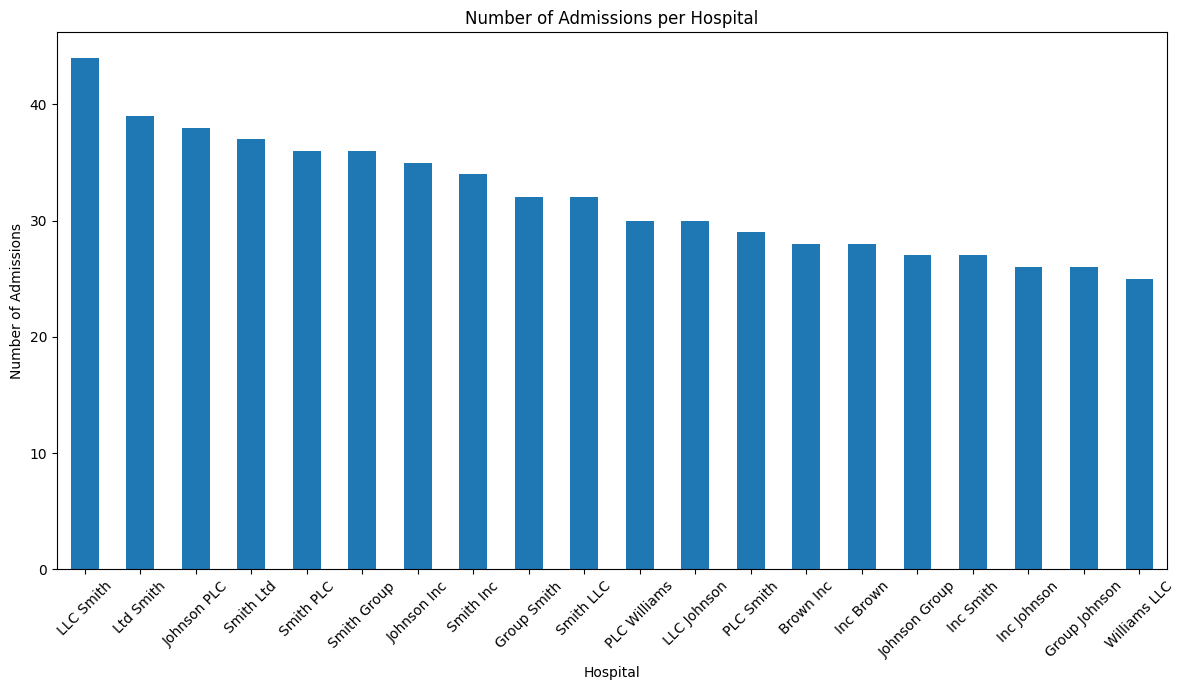

In [ ]:
admissions_per_hospital = df['Hospital'].value_counts()
plt.figure(figsize=(12, 7))
admissions_per_hospital.head(20).plot(kind='bar')
plt.title(f'Number of Admissions per Hospital')
plt.xlabel('Hospital')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 5: Xəstə xroniki xəstəliklərindən hansıların sayı çoxdur?


In [ ]:
import numpy as np

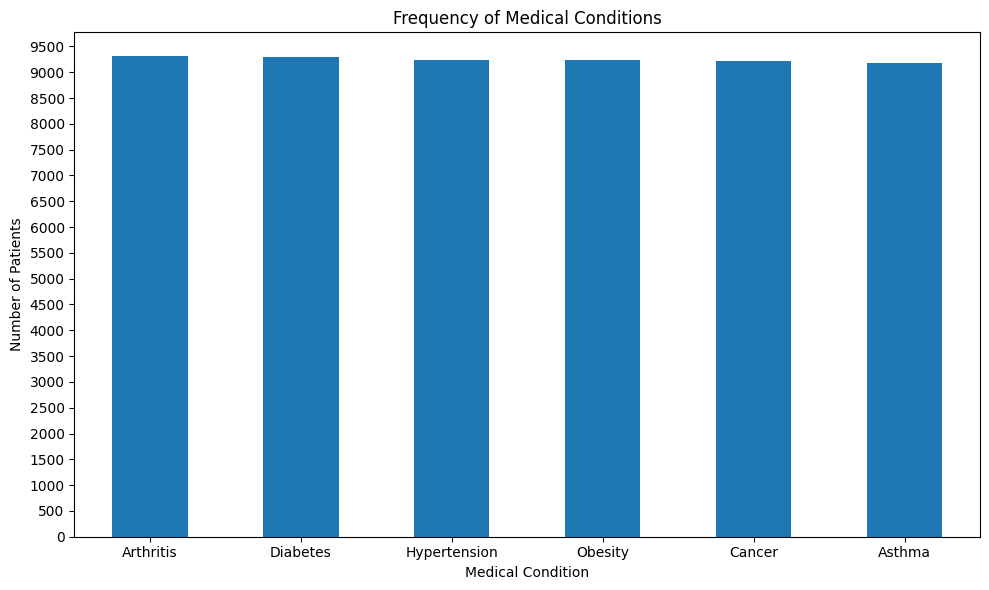

In [ ]:
condition_counts = df['Medical Condition'].value_counts()


plt.figure(figsize=(10, 6))
plt.yticks(np.arange(0, 10001, 500))
condition_counts.plot(kind='bar')
plt.title('Frequency of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 6: İtirilmiş dəyərlər varmı və necə idarə edilməlidir?

In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


### nullar olsaydi eger dropna ile nullari ata bilerdik ve ya fillna ile doldurardiq

### Question 7: Verilənlərin balansı necədir (xəstə / sağlam kimi kateqoriyalar)?

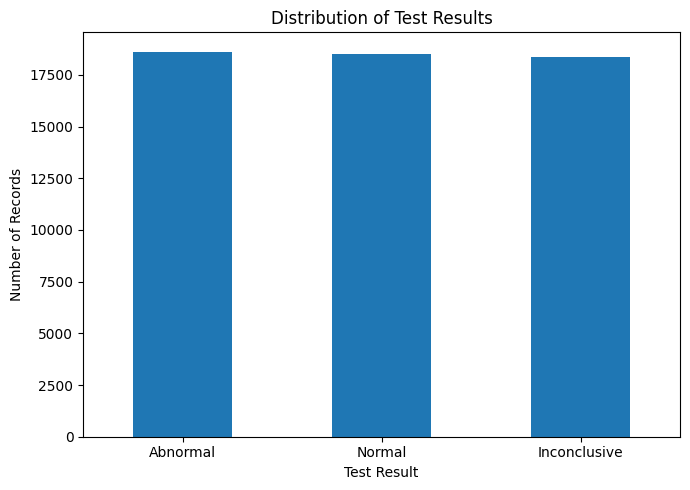

In [ ]:
test_result_counts = df['Test Results'].value_counts()

plt.figure(figsize=(7, 5))
test_result_counts.plot(kind='bar')
plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 8: Outlier-lər varmı və necə aşkarlanmalıdır?


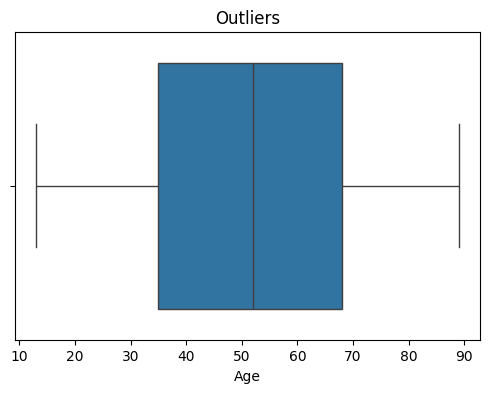

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Outliers')
plt.show()

### Question 9: Verilənlərin vizual təhlili necə aparılmalıdır?

Datanin nece paylandigini mueyyen etmek

Elaqeleri askar etmek

Outliersleri askar etmek

Qruplar arasinda ferqleri mueyyenlesdirmek(meselen: kisilerin ve qadinlarin ortalama mualice ferqi, yas qruplarina gore test neticeleri ve s.)

### Question 10: Əsas nəticələr və tövsiyələr nə olmalıdır?

elaqelerin vizuallasdirmasindan ne elde edilmesi ve bunlarin neticesinde bu statistikalara esasen teklif ireli surmek